Isabela P. L. Dias

M.Sc. in Physics and  data scientist

✉: isabeladiaspl@icloud.com

LinkedIn: [diasplisabela](https://www.linkedin.com/in/diasplisabela/)	Github: [isadays](https://github.com/isadays/)

São Paulo, Brazil.

** Overview**:
Eneva (ENEV3:BZ), listed in the new market segment of the B3 (Brazilian Stock Exchange),
is one of Brazil's leading integrated energy companies. With a focus on natural gas
exploration, production, and other energy solutions, Eneva's operations span across
Amazonas, Maranhão, Mato Grosso do Sul, and Goiás. The company currently manages
12 natural gas fields within the Parnaíba (MA) and Amazonas (AM) basins.

For this task, I extracted and aggregated hourly production data from ONS with
fields breakdown into quarterly data for selected fields and do an exploration and analysis
on how it relates to Eneva’s production (GWh).

Generate a Jupiter notebook report in html with your analysis and conclusions on the
problem, it should contain:

a. A brief description of the problem

b. the methodology used

c. Descriptive statistics

d. Trend analysis

e. What is the correlation of both production series?

f. Is it possible to infer the next quarter Eneva’s production (GWh) using the
provided ONS data? What would be the error for each quarter?

## Exploration analysis

The task  is an exploration analysis focusing on comparing electricity production data reported by ONS (Operador Nacional do Sistema Elétrico - the National System Operator in Brazil) with that of Eneva, a company operating in various Brazilian states such as Amazonas, Maranhão, Mato Grosso do Sul, and Goiás. Our main objective is to assess whether the production reported by ONS can be used as reliable predictors for Eneva's future electricity production, specifically for the upcoming quarter. We use a historical data from 2016 to 2022.

Context:
ONS (Operador Nacional do Sistema Elétrico): ONS is responsible for coordinating and controlling the operation of the electricity generation and transmission facilities in the Brazilian Interconnected Power System.

Eneva: Eneva is an integrated energy company that operates in the exploration, production, and generation of electricity, particularly in the mentioned states. Their production data is more specific and localized compared to the broader data provided by ONS.


In [8]:
#import libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

**First Step: Data Extraction**

In [ ]:
!python3 data_extraction.py both 2022 1 12

In [ ]:
!python3 data_extraction.py historical_ons 16 21

**Data Aggregation**

In [ ]:
!python3 data_aggregation.py

**Loading the Views for historical ONS data**

In [126]:
conn = sqlite3.connect('historicaldb.db')
# Query the view 'Total_Dispatch_hist' and load it into a DataFrame
df_total_dispatch_hist = pd.read_sql_query("SELECT * FROM Total_Dispatch_hist", conn)
df_total_dispatch_ons_quarterly = pd.read_sql_query("SELECT * FROM Total_Dispatch_ONS_Quarterly", conn)
df_total_dispatch_eneva = pd.read_sql_query("SELECT * FROM Total_Dispatch_Eneva", conn)
conn.close()


**Normalize Units**

To compare the ONS quarterly data with Eneva's quarterly data, we need to ensure that we are aligning the data correctly based on the quarters. For this purpose, we create a datetime that receives the converted date values from both datasets

In [127]:
combined_data_ONS = pd.concat([df_total_dispatch_hist,df_total_dispatch_ons_quarterly], ignore_index=False)

In [128]:
def convert_to_datetime(row):
    year = int(row['year'])  # Convert year to integer
    quarter = int(row['quarter'])  # Convert quarter to integer
    month = (quarter - 1) * 3 + 1  # Calculate the starting month of the quarter
    return pd.Timestamp(year=year, month=month, day=1)

combined_data_ONS['datetime'] = combined_data_ONS.apply(convert_to_datetime, axis=1)

In [132]:
def quarter_to_datetime(quarter_str):
    year = int('20' + quarter_str[2:])
    quarter = int(quarter_str[0])
    month = (quarter - 1) * 3 + 1
    return pd.Timestamp(year=year, month=month, day=1)

df_total_dispatch_eneva['datetime'] = df_total_dispatch_eneva['quarter'].apply(quarter_to_datetime)

**Descriptive Statistics**
Descriptive statistics for the aligned quarters.

In [137]:
print(combined_data_ONS.describe()),print(df_total_dispatch_eneva.describe())

        quarter  total_val_geracao_gwh
count  28.00000              28.000000
mean    2.50000            2776.032487
std     1.13855            1579.951781
min     1.00000             765.042890
25%     1.75000            1741.788866
50%     2.50000            2475.092936
75%     3.25000            3860.925663
max     4.00000            6444.205904
       total_gross_generation_gwh
count                   32.000000
mean                  2345.128230
std                   1394.680861
min                    366.320004
25%                   1317.696284
50%                   1990.404134
75%                   3332.277947
max                   5927.282005


(None, None)

**Comparison**

-  The ONS dataset has 28 entries, while the Eneva's has 32.

- The mean of the ONS dataset is higher (2776.03 GWh) compared to the Eneva's (2345.13 GWh), suggesting that, on average, the total generation in the first dataset is higher.

- The median follows a similar pattern, with the ONS dataset having a higher median (2475.09 GWh) than the Eneva (1990.40 GWh).

- Standard Deviation: The ONS dataset has a higher standard deviation (1579.95 GWh) compared to the Eneva's (1394.68 GWh), indicating that the data points in the ONS dataset has greater variability or fluctuations in total generation values.


- Range (Min-Max): The range of the data (difference between max and min) is broader in the ONS dataset (6444.21 - 765.04 GWh) than in the Eneva (5927.28 - 366.32 GWh), suggesting that the first dataset experiences a wider variance in the total generation values.


- Quartiles (25%, 50%, 75%): The differences between 75th percentile and 25th percentile are different, indicating variability in the distribution of the middle 50% of data. The ONS dataset shows a broader interquartile range, suggesting more variability in its central values.

**Visual data exploration**:

A possible exploration is to create visualizations for the datasets that may help us understand the distribution of the data, identify patterns or outliers, making initial comparasions between the two datasets.

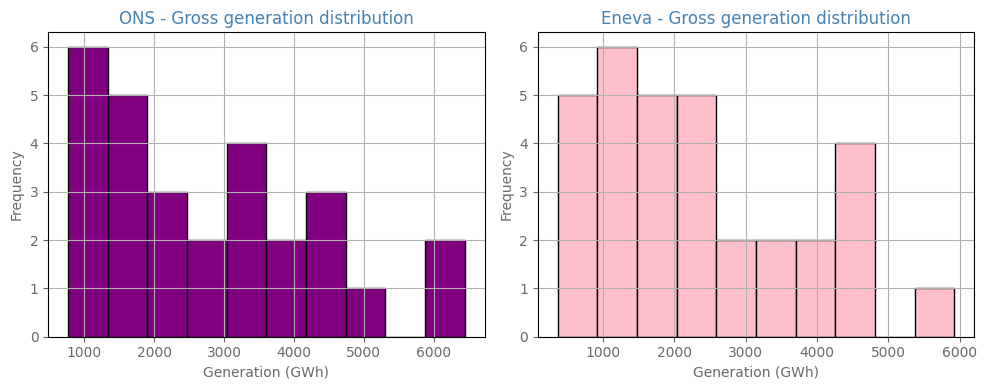

In [140]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
combined_data_ONS['total_val_geracao_gwh'].hist(color='purple', edgecolor='black')
plt.title('ONS - Gross generation distribution', color='steelblue')
plt.xlabel('Generation (GWh)', color='dimgray')
plt.ylabel('Frequency', color='dimgray')
plt.tick_params(colors='dimgray')

plt.subplot(1, 2, 2)
df_total_dispatch_eneva['total_gross_generation_gwh'].hist(color='pink', edgecolor='black')
plt.title('Eneva - Gross generation distribution', color='steelblue')
plt.xlabel('Generation (GWh)', color='dimgray')
plt.ylabel('Frequency', color='dimgray')
plt.tick_params(colors='dimgray')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()




Note from the histograms that the data distribution are quite different, which can be explained by divergence of measurements or operational data.


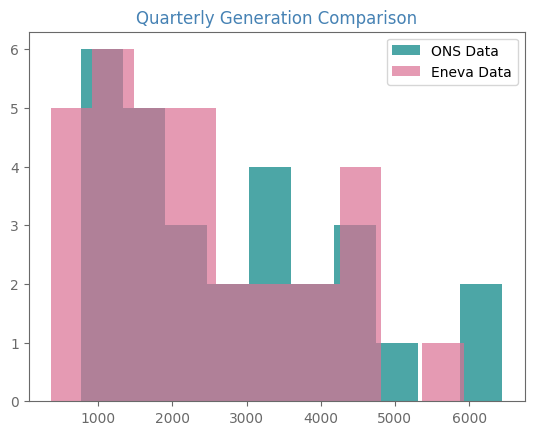

In [142]:
import matplotlib.pyplot as plt

data1 = combined_data_ONS['total_val_geracao_gwh']
data2 = df_total_dispatch_eneva['total_gross_generation_gwh']

fig, ax = plt.subplots()

ax.hist(data1, color='teal', alpha=0.7, label='ONS Data')
ax.hist(data2, color='palevioletred', alpha=0.7, label='Eneva Data')

ax.set_title('Quarterly Generation Comparison', color='steelblue')

ax.tick_params(colors='dimgray')
for spine in ax.spines.values():
    spine.set_edgecolor('dimgray')

plt.legend()
plt.show()

**Differences in Generation Values**: Note from the histograms Eneva's operations might have produced less energy during some quarters quarters due to operational constraints, maintenance activities, capacity limitations, or other operational factors. Also,there could be differences in how generation data is measured, reported, or rounded.


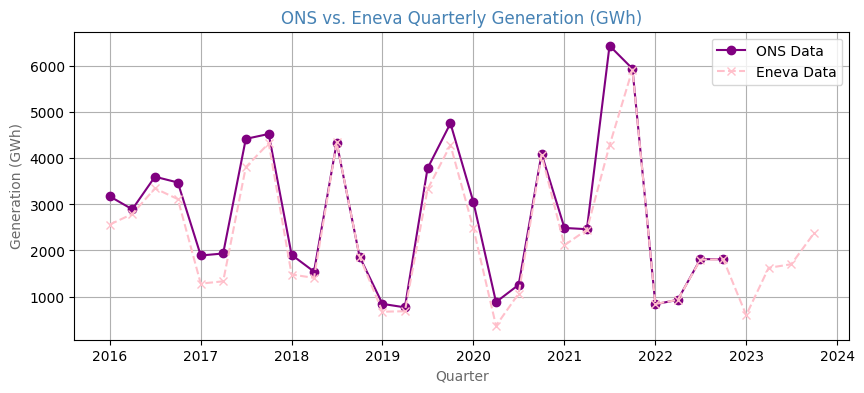

In [155]:
ons_quarterly_aggregated = combined_data_ONS.groupby('datetime').agg({'total_val_geracao_gwh': 'first'}).reset_index()
eneva_quarterly_aggregated = df_total_dispatch_eneva.groupby('datetime').agg({'total_gross_generation_gwh': 'first'}).reset_index()
plt.figure(figsize=(10, 4))

plt.plot(ons_quarterly_aggregated['datetime'], ons_quarterly_aggregated['total_val_geracao_gwh'], marker='o', linestyle='-', color='purple', label='ONS Data')

plt.plot(eneva_quarterly_aggregated['datetime'], eneva_quarterly_aggregated['total_gross_generation_gwh'], marker='x', linestyle='--', color='pink', label='Eneva Data')

plt.title('ONS vs. Eneva Quarterly Generation (GWh)', color='steelblue')
plt.xlabel('Quarter', color='dimgray')
plt.ylabel('Generation (GWh)', color='dimgray')
plt.legend()
plt.grid(True)
plt.show()


There is a significant difference in the datasets in the transition 2020-2021. Possibly factors could have influenced the generation volumes, causing the observed differences: Market Demand: Changes in electricity demand, influenced by economic activities, weather conditions, or seasonal variations, could affect generation volumes. Regulatory or Policy Changes: New regulations, policy changes, or market mechanisms could impact the operational strategies of energy producers, influencing their reported generation figures.









**Correlation between ONS and Eneva data**

In [147]:
combined_quarterly_data = pd.merge(
    ons_quarterly_aggregated,
    eneva_quarterly_aggregated,
    on='datetime',
    suffixes=('_ons', '_eneva')
)

correlation = combined_quarterly_data[['total_val_geracao_gwh', 'total_gross_generation_gwh']].corr()
print("Correlation matrix for the aggregated quarterly data in historical data:")
print(correlation)




Correlation matrix for the aggregated quarterly data in historical data:
                            total_val_geracao_gwh  total_gross_generation_gwh
total_val_geracao_gwh                    1.000000                    0.963826
total_gross_generation_gwh               0.963826                    1.000000


This correlation analysis provides a strong quantitative foundation indicating that the electricity generation figures from ONS and Eneva are closely aligned, at least on the aggregated quarterly level over the years (2016-2022).







**Predicting**

Coefficients: [0.87827267]
Mean squared error: 141990.29320550853
Coefficient of determination (R^2): 0.928959910984072


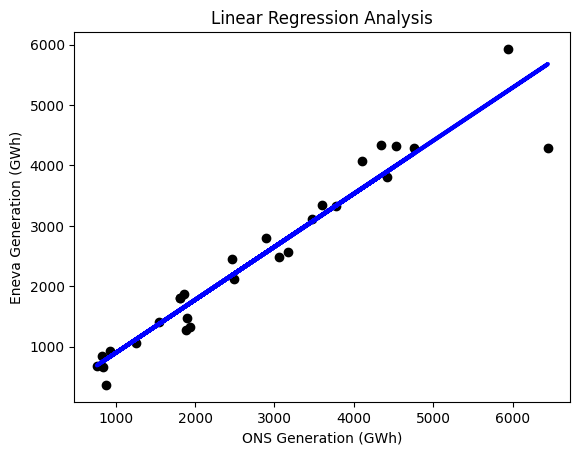

In [148]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

X = combined_quarterly_data[['total_val_geracao_gwh']]  # ONS data
y = combined_quarterly_data['total_gross_generation_gwh']  # Eneva data

model.fit(X, y)

y_pred = model.predict(X)

coefficients = model.coef_
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print(f"Coefficients: {coefficients}")
print(f"Mean squared error: {mse}")
print(f"Coefficient of determination (R^2): {r_squared}")


import matplotlib.pyplot as plt

plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('ONS Generation (GWh)')
plt.ylabel('Eneva Generation (GWh)')
plt.title('Linear Regression Analysis')
plt.show()


**Regression Coefficients**

Coefficients (Slope): The coefficient [0.87827267] indicates the slope of the regression line. This value signifies that for each one-unit increase in ONS generation (GWh), the Eneva generation (GWh) is expected to increase by approximately 0.878 units, assuming the relationship between these variables is linear.

Mean Squared Error (MSE): The MSE is 141990.293, representing the average of the squares of the errors. The error is the amount by which the value predicted by the model deviates from the actual value.


Coefficient of Determination (R²): The R² value is 0.928959910984072, very close to 1. This metric provides a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. An R² value of 0.93 suggests that the model explains 93% of the variability in the Eneva generation data from the ONS generation data, indicating a strong linear relationship. This fact is not enough to assert a good prediction.


Difference between predicted and actual values



In [154]:
# Calculate residuals (errors) for the historical data
residuals = y - y_pred
mean_residuals = np.mean(residuals)
mean_residuals

-7.795668872339384e-13

The residuals should have constant variance across the range of predicted values. If the variance changes (a condition known as heteroscedasticity), it could imply that the model fits the data better in some areas than in others, or that there are missing predictors that influence the variance.


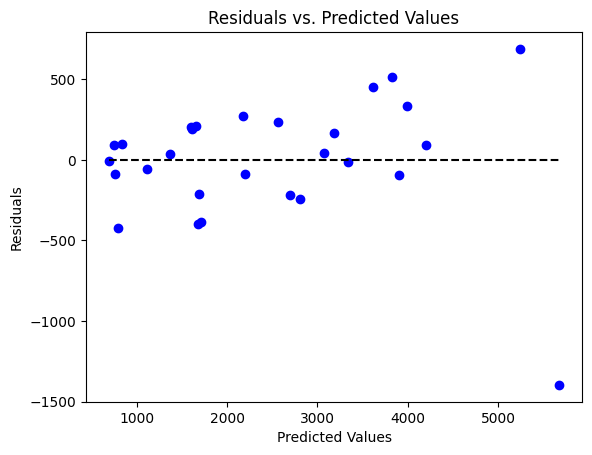

In [153]:
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred), colors='black', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


Note that, a good fit model will have residuals that are randomly scattered around zero, indicating that the model's predictions are unbiased and that the model has captured the true underlying pattern in the data.  However, it is not the case. The plot is very intuitive to notice that our model has large errors (both positive and negative) for individual predictions.

**Conclusion**

In this task we have explored the predictive analysis to determine wheter ONS's data can predict Eneva's production. For this purpose, we used the ONS data as prediction and Eneva's production as the dependent variable.
In summary, the analysis indicates a strong linear relationship between the ONS and Eneva generation data, with the linear regression model providing a good fit to the observed data, explaining a significant portion of the variance in the relationship between the two datasets.


The choice for linear regression realies on the fact that it is a starting point for this type of analysis. It helps in understanding the linear relationship between the two datasets. Our analysis shows that besides the fact the ONS data fits very well to Eneva's data, it is not enough to set a strong correlation between them. In summary, the ONS data is not a good predictor. Our main metrics were the R-squared coefficent, which explains how well the ONS data explains the variance in the Eneva's production.

The residual analysis investigated the differences between the observed and predicted values, helping us in understanding the model's accuracy. Since the data involves quarterly production, it is essential to consider the temporal nature of the data, i.e., seasonal trends and external economica factors that may influence the production and hence, the predictive modeling.

